Project Assignment #1
In this project assignment, we are going to use the "Traffic Tickets Issued: Four Year Window" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation).

The focus of the analysis will be oriented towards the following attributes within the cities of :

1) Violation Year

2) Violation Month

3) Violation Day of Week

4) Age at Violation

5) Gender

There are a few objectives you need to accomplish:

1) Examine the above-mentioned attributes in the data set for any missing values

2) If there are any missing values, treat the misisng values. Here is a article that provides insight into the common methods to deal with missing values:

https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

Please the tips provided in the article to deal with missing values

3) Compute summary statistics for the "age at violation" for Males and Females respectively

a) Mean, b) Median, c) Standard Deviation, d) Variance

4) Construct a Boxplot to surface the 25%, 50% and 75% percentiles of "Age at Violation" by Gender

5) Construct Histograms to showcase the following:

a) Count of Violations by Day of Week

b) Count of Violations by Month

c) Count of Violations by Gender

6) Hone in on the data set for the Year 2015. Does the 'Violation at Age' and the 'Total # Of Violations' vary together? Construct a scatter plot that plots the 'Violation at Age' v/s the Total # Of Violation'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance. Perform this analysis for both the genders.

7) Compute the Correlation Coefficient between the 2 variable i.e. 'Violation at Age' and the 'Total # Of Violations'. Perform this analysis for both the genders.

In [0]:
#run only once!
!pip install -U -q PyDrive

In [0]:
# Load Data
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# file_id: string (id of the file you want to download)
# title: string (name which you want to give to the file being downloaded)

    
def upload_file_to_drive(file, title):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    export = drive.CreateFile({'title':title})  
    export.SetContentFile(file)
    export.Upload()

    return export['id']  

def download_file_from_drive(file_id, title):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
  
    download = drive.CreateFile({'id': file_id})
    download.GetContentFile(title)

In [4]:
#run only once!

!wget "https://data.ny.gov/api/views/q4hy-kbtf/rows.csv?accessType=DOWNLOAD" -nc -O traffic.csv

--2018-05-02 15:09:23--  https://data.ny.gov/api/views/q4hy-kbtf/rows.csv?accessType=DOWNLOAD
Resolving data.ny.gov (data.ny.gov)... 52.206.140.205
Connecting to data.ny.gov (data.ny.gov)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘traffic.csv’

traffic.csv             [     <=>            ] 121.16M  2.09MB/s               

traffic.csv             [  <=>               ]   1.45G  2.16MB/s               

traffic.csv             [<=>                 ]   1.45G  2.22MB/s    in 12m 35s 

Last-modified header invalid -- time-stamp ignored.
2018-05-02 15:21:59 (1.97 MB/s) - ‘traffic.csv’ saved [1558223985]



In [0]:
# run only once!

file_id = upload_file_to_drive('traffic.csv', 'traffic_uploaded.csv')
download_file_from_drive(file_id, 'traffic_downloaded.csv')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('traffic_downloaded.csv')
print(data.columns)

print(data.shape)

Index(['Violation Charged Code', 'Violation Description', 'Violation Year',
       'Violation Month', 'Violation Day of Week', 'Age at Violation',
       'Gender', 'State of License', 'Police Agency', 'Court', 'Source'],
      dtype='object')
(14275009, 11)


In [7]:
data1 = data[['Violation Year','Violation Month','Violation Day of Week','Age at Violation','Gender']]
print (data1.head(10))

   Violation Year  Violation Month Violation Day of Week  Age at Violation  \
0            2015                1              THURSDAY              55.0   
1            2015                1              THURSDAY              24.0   
2            2015                2                MONDAY              62.0   
3            2015                9              THURSDAY              33.0   
4            2015                5              SATURDAY              45.0   
5            2015                8              SATURDAY              42.0   
6            2015                3              THURSDAY              21.0   
7            2015                2              SATURDAY              40.0   
8            2015                6                MONDAY              53.0   
9            2015                1              SATURDAY              22.0   

  Gender  
0      M  
1      M  
2      M  
3      F  
4      M  
5      M  
6      M  
7      M  
8      M  
9      M  


In [8]:
#Identify the columns with nan's

data1.isnull().sum()

Violation Year                0
Violation Month               0
Violation Day of Week         0
Age at Violation         158181
Gender                        0
dtype: int64

In [7]:
# Identify unique values for Gender Attribute

print (data1['Gender'].unique())
print (data1['Violation Year'].unique())

['M' 'F' 'C']
[2015 2016 2013 2014]


In [15]:
# Replace Nan values in Age attribute by the median value of Age attribute
age = data1['Age at Violation'].median()
print (age)
data1['Age at Violation'].fillna(age, inplace = True)

34.0


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
print (sum(pd.isnull(data1['Age at Violation'])))

0


In [21]:
# Compute summary statistics for the "age at violation" for Males and Females respectively
data3 = data1.loc[data1['Gender'].isin(['M','F'])]
grouped = data3.groupby('Gender')['Age at Violation']
grouped.describe()
mean = grouped.mean()
print ("mean for each Gender")
print (mean)
print ("\n")

print ("median for each Gender")
median = grouped.median()
print (median)
print ("\n")

print ("Standard Deviation for each Gender")
stdeviation = grouped.std()
print (stdeviation)
print ("\n")

print ("Variance for each Gender")
variance = grouped.var()
print (variance)
print ("\n")

print ("25th percentile for each Gender")
print (grouped.apply(np.percentile, 25))
print ("\n")

print ("50th percentile for each Gender")
print (grouped.apply(np.percentile, 50))
print ("\n")

print ("75th percentile for each Gender")
print (grouped.apply(np.percentile, 75))

mean for each Gender
Gender
F    36.271181
M    37.020346
Name: Age at Violation, dtype: float64


median for each Gender
Gender
F    33.0
M    34.0
Name: Age at Violation, dtype: float64


Standard Deviation for each Gender
Gender
F    13.510939
M    13.840881
Name: Age at Violation, dtype: float64


Variance for each Gender
Gender
F    182.545467
M    191.569986
Name: Age at Violation, dtype: float64


25th percentile for each Gender
Gender
F    25.0
M    25.0
Name: Age at Violation, dtype: float64


50th percentile for each Gender
Gender
F    33.0
M    34.0
Name: Age at Violation, dtype: float64


75th percentile for each Gender
Gender
F    46.0
M    47.0
Name: Age at Violation, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


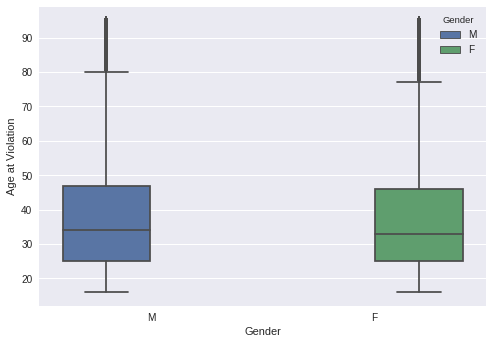

In [24]:
sns.boxplot(x="Gender", y="Age at Violation", data=data3, hue = "Gender")


         Day  Total Violations
0     FRIDAY           2230294
1  WEDNESDAY           2183703
2   THURSDAY           2175701
3    TUESDAY           2132309
4   SATURDAY           1977429
5     MONDAY           1886748
6     SUNDAY           1688825


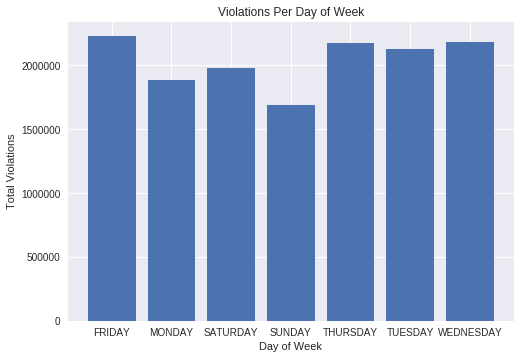

In [39]:
# Calculating Total violations per each day of week

per_day_count = pd.DataFrame(data1['Violation Day of Week'].value_counts().reset_index())
per_day_count.columns = ['Day','Total Violations']
print (per_day_count)

plt.bar(per_day_count['Day'],per_day_count['Total Violations'])
plt.title("Violations Per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Violations")
plt.show()

    Month  Total Violations
0       5           1344953
1       3           1296420
2       4           1287032
3       8           1225960
4      10           1210322
5       7           1194083
6       9           1185059
7       1           1182499
8       6           1174001
9       2           1120350
10     11           1106784
11     12            947546


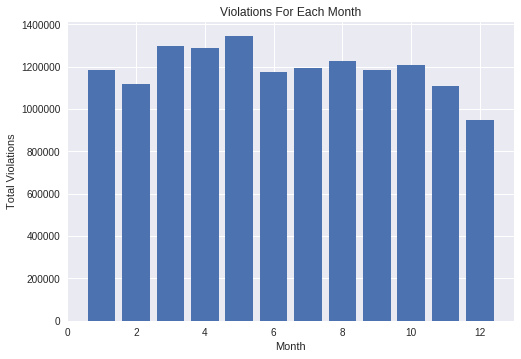

In [40]:
#Calculating Total Violations by each month of the year

per_month_count = pd.DataFrame(data1['Violation Month'].value_counts().reset_index())
per_month_count.columns = ['Month','Total Violations']
print (per_month_count)

plt.bar(per_month_count['Month'],per_month_count['Total Violations'])
plt.title("Violations For Each Month")
plt.xlabel("Month")
plt.ylabel("Total Violations")
plt.show()

  Gender  Total Violations
0      M          10227193
1      F           3905110


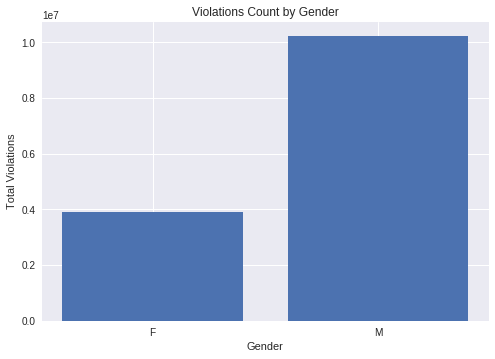

In [43]:
# Calculating Violations By Gender
violations_by_gender = pd.DataFrame(data3['Gender'].value_counts().reset_index())
violations_by_gender.columns =['Gender','Total Violations']
print (violations_by_gender)

plt.bar(violations_by_gender['Gender'],violations_by_gender['Total Violations'])
plt.title("Violations Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Violations")
plt.show()

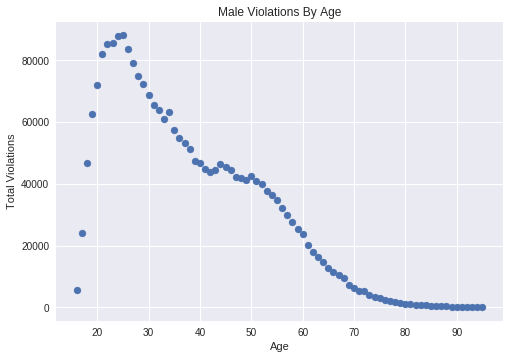

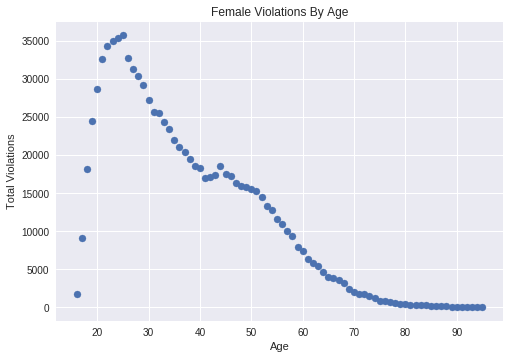

In [55]:
# Hone in on the data set for the Year 2015. Does the 'Violation at Age' and the 'Total # Of Violations' vary together? 
 # Construct a scatter plot that plots the 'Violation at Age' v/s the Total # Of Violation'.
 # Does the Scatter Plot point to a positive covariance? Now, compute the Covariance. Perform this analysis for both the genders.

data4 = data1[data1['Violation Year'] == 2015]
#print (data4.head(10))

data_M = data4[data4['Gender'] =='M']
data_F = data4[data4['Gender'] == 'F']

violations_M = pd.DataFrame(data_M['Age at Violation'].value_counts().reset_index())
violations_M.columns =['Age','Total Violations']
#print (violations_M)

violations_F = pd.DataFrame(data_F['Age at Violation'].value_counts().reset_index())
violations_F.columns =['Age','Total Violations']
#print (violations_F)

plt.scatter(violations_M['Age'],violations_M['Total Violations'])
plt.title("Male Violations By Age")
plt.xlabel("Age")
plt.ylabel("Total Violations")
plt.show()

plt.scatter(violations_F['Age'],violations_F['Total Violations'])
plt.title("Female Violations By Age")
plt.xlabel("Age")
plt.ylabel("Total Violations")
plt.show()

From the above Graphs, it can be seen that, total number of violations decreases as the age increases for both Genders and hence it is negatively correlated.

In [62]:
#Compute the Correlation Coefficient between the 2 variable i.e. 'Violation at Age' and the 'Total # Of Violations'.
#Perform this analysis for both the genders.

#Covariance 
cov_M = np.cov(violations_M['Age'],violations_M['Total Violations'])
print ("Covariance with violation by age for Male")
print (cov_M[0][1])
print ("\n")

cov_F = np.cov(violations_F['Age'],violations_F['Total Violations'])
print ("Covariance with violation by age for Female")
print (cov_F[0][1])
print ("\n")

#Correlation Coefficient for both Genders
corr_M = np.corrcoef(violations_M['Age'],violations_M['Total Violations'])
print ("Correlation Coefficient with violation by age for Male")
print (corr_M[0][1])
print ("\n")

corr_F = np.corrcoef(violations_F['Age'],violations_F['Total Violations'])
print ("Correlation Coefficient with violation by age for Female")
print (corr_F[0][1])

Covariance with violation by age for Male
-586520.651898734


Covariance with violation by age for Female
-232857.8924050633


Correlation Coefficient with violation by age for Male
-0.8921120691790662


Correlation Coefficient with violation by age for Female
-0.8850425523745589


As Expected, the correlation coeffient and covariance is also negative for both Genders.